# Search Campaigns for Datacamp

## Ad Generation / Copy Writing

### Strategy

We currently have the following: 
1. Campaigns and ad group names properly mapped to each other in `full_keywords_df` data frame
2. Ad group name and the corresponding URL from our previous scraping (courses, instructors, and tracks), and we need to generate one for technologies. 

Here is the plan: 

1. Create ad templates to use (2-3 should be good to start with)
4. Create a `Campaign` column and add it to the (name, url) data frames
2. Merge all the (name, url) data frames into one data frame
3. Generate all ads for all ad groups; this consists of the following fields for each ad (these would be new columns in the same data frame we are working with): 
    * Headline 1: maximum 30 charaters
    * Headline 2: maximum 30 charaters
    * Display URL: automatically inferred from the final URL
    * Final URL: the full path where the user will end up (has to be the same domain as the display URL 

5. Make sure the work is consistent with the keywords data frame
6. Upload and launch campaigns! 

Generating ads simply means replacing the topics name (course, tech, instructor, etc) where it belongs in the template, and making 2-3 ad variations for each of the ad groups that we have. 


In [254]:
%%html
<img src="text_ad_diagram.png" width=670>

### Ad Templates

An important thing to take note of, is that although plugging in the ad group names where they belong is a straighforward process, the problem is that we need to have the length of the fields under the limits mentioned above. And since the names of our courses and topics vary a lot, we need to see what can be done about it. Let's see how much of a problem that is. 

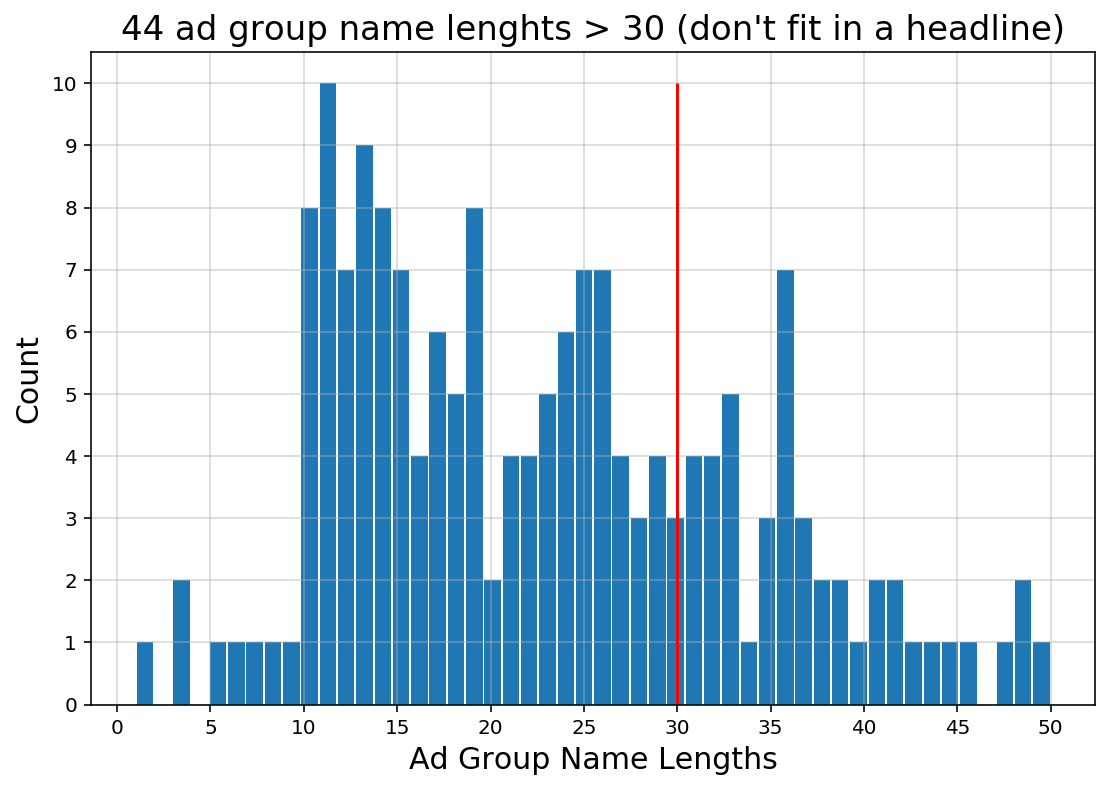

In [256]:
%matplotlib inline
import matplotlib.pyplot as plt
adgroup_lengths = pd.Series([len(adgrp) for adgrp in full_keywords_df['Ad Group'].unique()])
long_adgroups = sum(adgroup_lengths > 30)
plt.figure(figsize=(9,6))
plt.hist(adgroup_lengths, rwidth=0.9, bins=50)
plt.vlines(x=30, ymin=0, ymax=10, colors='red')
plt.title(str(long_adgroups) + ' ad group name lenghts > 30 (don\'t fit in a headline)',  fontsize=17)
plt.xlabel('Ad Group Name Lengths', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.yticks(range(11))
plt.xticks(range(0, 51, 5))
plt.grid(alpha=0.5)
plt.show()

It seems our problem is not a trivial one, and there is no straightforward way of dealing with it. Ideally, we would like to have the two headlines contain the full title of the product (course) that we are promoting.   
I thought of different ways around it, and decided to write a simple algorithm that splits the name into two phrases, each containing at most thirty characters. 

The algorithm is not suitable for general use, and needs some tweaks to make it general, but it works well enough for this data set. 

In [185]:
def split_string(string, splits=2, max_len=60):
    """Split `string` into `splits` words, each shorter than `max_len` / `splits`"""
    if len(string) < max_len / splits:
        return string, ''
    str_words = string.split(' ')
    result = ''
    for i, word in enumerate(str_words):
        if len(result + ' ' + word) <= max_len / splits:
            result += word + ' '
        else:
            break
    spaces = result.strip().count(' ')
    result2 = string[string[len(result):].index(word) + len(result):]
    return result.strip(), result2

In [350]:
print(split_string('this is a very long course name that needs splitting', 2, 60))
print(split_string('short course name', 2, 60))

('this is a very long course', 'name that needs splitting')
('short course name', '')


This is not something that I do usually, but I like this technique, and I think I'll be using it when creating other campaigns. That's a nice side effect of writing a tutorial!     
Now let's think about the templates that we want to write.   
The general ad template that I use consists of the following elements (typically in this order).         
* **Product**: If I'm searching for 'data science course' on Google, I need to see 'data science course' in the links / ads somewhere.
* **Benefits**: This is the emotinal / psychological thing that people are really after, beyond just completing the course, 'boost your career', 'stand out from the crowd'. 
* **Features**: Now that you've promised me the moon, show me how you are going to get me there! 'over 100 data science courses', 'learn from top experts', 'get instant feedback on your coding skills'. 
* **Call to action**: Ok, so you told me what you have, you motivated me to buy it, and you showed me how I'm going to get there. I'm sold. What do I do now? 'sign up for a free trial', 'sample first chapters for free', 'save 20% on annual subscriptions'

It's not easy to put all these in one ad which is a tweet long, and some of them may overlap. But we will try our best.

### 1. Ad Templates: 

* Headline 1: This will always contain the name of the course (or the first half). 
* Headline 2: The second half of the course name, or one of the following: 
    * Boost Your Data Science Career
    * Stand Out From the Crowd
    * Tackle Complex Questions
* Description: each ad group will have the three variations below and they will rotate.
    * Learn Directly From the Top Experts in the Field. 20% off Annual Subcriptions
    * Get Ahead of the Curve, Master Data Science Skills. $29 / Month. Cancel Anytime
    * Choose From a Wide Variety of Topics Tuaght by the Best in the World. Start Now

### 2. Crate `Campaign` Column

In [351]:
full_keywords_df.Campaign.unique()  # make sure we are consistent with our previous work

array(['SEM_Instructors', 'SEM_Technologies', 'SEM_Courses', 'SEM_Tracks'], dtype=object)

In [243]:
course_df['Campaign'] = 'SEM_Courses'
course_df = course_df.rename(columns={'name_clean': 'name', 'name': 'old_name'})
course_df.head()

,old_name,url,name,Campaign
0,Intro to Python for Data Science,https://www.datacamp.com/courses/intro-to-pyth...,Intro to Python for Data Science,SEM_Courses
1,Introduction to R,https://www.datacamp.com/courses/free-introduc...,Introduction to R,SEM_Courses
2,Intermediate Python for Data Science,https://www.datacamp.com/courses/intermediate-...,Intermediate Python for Data Science,SEM_Courses
3,Intro to SQL for Data Science,https://www.datacamp.com/courses/intro-to-sql-...,Intro to SQL for Data Science,SEM_Courses
4,Intermediate R,https://www.datacamp.com/courses/intermediate-r,Intermediate R,SEM_Courses


In [36]:
instructor_df['Campaign'] = 'SEM_Instructors'
instructor_df.head()

,name,url,Campaign
0,Filip Schouwenaars,https://www.datacamp.com/instructors/filipsch,SEM_Instructors
1,Jonathan Cornelissen,https://www.datacamp.com/instructors/jonathana...,SEM_Instructors
2,Hugo Bowne-Anderson,https://www.datacamp.com/instructors/hugobowne,SEM_Instructors
3,Nick Carchedi,https://www.datacamp.com/instructors/nickyc,SEM_Instructors
4,Greg Wilson,https://www.datacamp.com/instructors/greg48f64...,SEM_Instructors


In [37]:
tracks_df['Campaign'] = 'SEM_Tracks'
tracks_df.head()

,name,url,Campaign
0,R Programming,https://www.datacamp.com/tracks/r-programming,SEM_Tracks
1,Importing Cleaning Data With R,https://www.datacamp.com/tracks/importing-clea...,SEM_Tracks
2,Data Manipulation With R,https://www.datacamp.com/tracks/data-manipulat...,SEM_Tracks
3,Python Programming,https://www.datacamp.com/tracks/python-program...,SEM_Tracks
4,Importing Cleaning Data With Python,https://www.datacamp.com/tracks/importing-clea...,SEM_Tracks


In [352]:
tech_domain = 'https://www.datacamp.com/courses/tech:'
tech_domain_list = []
for tech in ['R', 'Python', 'SQL', 'Git', 'Shell']:
    tech_domain_list.append((tech, tech_domain + tech))
tech_df = pd.DataFrame.from_records(tech_domain_list, columns=['name', 'url'])
tech_df['Campaign'] = 'SEM_Technologies'
tech_df

,name,url,Campaign
0,R,https://www.datacamp.com/courses/tech:R,SEM_Technologies
1,Python,https://www.datacamp.com/courses/tech:Python,SEM_Technologies
2,SQL,https://www.datacamp.com/courses/tech:SQL,SEM_Technologies
3,Git,https://www.datacamp.com/courses/tech:Git,SEM_Technologies
4,Shell,https://www.datacamp.com/courses/tech:Shell,SEM_Technologies


### 3. Merge All (name, url) Data Frames

In [359]:
full_ads_df = pd.concat([course_df[['Campaign', 'name', 'url']],
                        instructor_df,
                        tracks_df,
                        tech_df], ignore_index=True)
full_ads_df = full_ads_df.rename(columns={'name': 'Ad Group', 'url': 'Final URL'})
print('total rows:', full_ads_df.shape[0])
full_ads_df.head()

total rows: 183


,Campaign,Ad Group,Final URL
0,SEM_Courses,Intro to Python for Data Science,https://www.datacamp.com/courses/intro-to-pyth...
1,SEM_Courses,Introduction to R,https://www.datacamp.com/courses/free-introduc...
2,SEM_Courses,Intermediate Python for Data Science,https://www.datacamp.com/courses/intermediate-...
3,SEM_Courses,Intro to SQL for Data Science,https://www.datacamp.com/courses/intro-to-sql-...
4,SEM_Courses,Intermediate R,https://www.datacamp.com/courses/intermediate-r


### 4. Generate Ads (insert templates)

Just to keep track of where we are. We now have the ads data fram containg `Campaign`, `Ad Group`, and `Final URL` columns properly mapped. We need to add the `Headline 1`, `Headline 2`, and `Description` Fields. Keep in mind that for each ad group we will be adding three different ad variation. This is a good practice mainly for testing purposes, to see what people click on, which ads convert more, etc. We should end up with a data frame of 183 x 3 = 549 rows.    

Let's start by duplicating each row three times, in the `full_ads_df`:

In [360]:
full_ads_df = full_ads_df.iloc[[x  for x in range(len(full_ads_df)) for i in range(3)], :] 
print('total rows:', full_ads_df.shape[0])
full_ads_df.head(9)

total rows: 549


,Campaign,Ad Group,Final URL
0,SEM_Courses,Intro to Python for Data Science,https://www.datacamp.com/courses/intro-to-pyth...
0,SEM_Courses,Intro to Python for Data Science,https://www.datacamp.com/courses/intro-to-pyth...
0,SEM_Courses,Intro to Python for Data Science,https://www.datacamp.com/courses/intro-to-pyth...
1,SEM_Courses,Introduction to R,https://www.datacamp.com/courses/free-introduc...
1,SEM_Courses,Introduction to R,https://www.datacamp.com/courses/free-introduc...
1,SEM_Courses,Introduction to R,https://www.datacamp.com/courses/free-introduc...
2,SEM_Courses,Intermediate Python for Data Science,https://www.datacamp.com/courses/intermediate-...
2,SEM_Courses,Intermediate Python for Data Science,https://www.datacamp.com/courses/intermediate-...
2,SEM_Courses,Intermediate Python for Data Science,https://www.datacamp.com/courses/intermediate-...


We now add the three different descriptions we created above. 

In [361]:
Description = [
    'Learn Directly From the Top Experts in the Field. 20% off Annual Subcriptions',
    'Be Ahead of the Curve, Master Data Science Skills. $29 / Month. Cancel Anytime',
    'Choose From a Wide Variety of Topics Tuaght by the Best in the World. Start Now'   
]
Description = [x for i in range(183) for x in Description ]
full_ads_df['Description'] = Description
full_ads_df.head(6)

,Campaign,Ad Group,Final URL,Description
0,SEM_Courses,Intro to Python for Data Science,https://www.datacamp.com/courses/intro-to-pyth...,Learn Directly From the Top Experts in the Fie...
0,SEM_Courses,Intro to Python for Data Science,https://www.datacamp.com/courses/intro-to-pyth...,"Be Ahead of the Curve, Master Data Science Ski..."
0,SEM_Courses,Intro to Python for Data Science,https://www.datacamp.com/courses/intro-to-pyth...,Choose From a Wide Variety of Topics Tuaght by...
1,SEM_Courses,Introduction to R,https://www.datacamp.com/courses/free-introduc...,Learn Directly From the Top Experts in the Fie...
1,SEM_Courses,Introduction to R,https://www.datacamp.com/courses/free-introduc...,"Be Ahead of the Curve, Master Data Science Ski..."
1,SEM_Courses,Introduction to R,https://www.datacamp.com/courses/free-introduc...,Choose From a Wide Variety of Topics Tuaght by...


Next we add `Headline 1` and `Headline 2` to the data frame. We are almost done!

In [362]:
benefits = [
    'Boost Your Data Science Career',
    'Stand Out From the Crowd',
    'Tackle Complex Questions'    
]

In [363]:
benefits = [x for i in range(183) for x in benefits]
headlines = [split_string(x) for x in full_ads_df['Ad Group']]
full_ads_df['Headline 1'] = [x[0] for x in headlines]
full_ads_df['Headline 2'] = [x[1] if x[1] else benefits[i] for i, x in enumerate(headlines)]
print('total ads:', full_ads_df.shape[0])
full_ads_df.head(9)

total ads: 549


,Campaign,Ad Group,Final URL,Description,Headline 1,Headline 2
0,SEM_Courses,Intro to Python for Data Science,https://www.datacamp.com/courses/intro-to-pyth...,Learn Directly From the Top Experts in the Fie...,Intro to Python for Data,Science
0,SEM_Courses,Intro to Python for Data Science,https://www.datacamp.com/courses/intro-to-pyth...,"Be Ahead of the Curve, Master Data Science Ski...",Intro to Python for Data,Science
0,SEM_Courses,Intro to Python for Data Science,https://www.datacamp.com/courses/intro-to-pyth...,Choose From a Wide Variety of Topics Tuaght by...,Intro to Python for Data,Science
1,SEM_Courses,Introduction to R,https://www.datacamp.com/courses/free-introduc...,Learn Directly From the Top Experts in the Fie...,Introduction to R,Boost Your Data Science Career
1,SEM_Courses,Introduction to R,https://www.datacamp.com/courses/free-introduc...,"Be Ahead of the Curve, Master Data Science Ski...",Introduction to R,Stand Out From the Crowd
1,SEM_Courses,Introduction to R,https://www.datacamp.com/courses/free-introduc...,Choose From a Wide Variety of Topics Tuaght by...,Introduction to R,Tackle Complex Questions
2,SEM_Courses,Intermediate Python for Data Science,https://www.datacamp.com/courses/intermediate-...,Learn Directly From the Top Experts in the Fie...,Intermediate Python for Data,Science
2,SEM_Courses,Intermediate Python for Data Science,https://www.datacamp.com/courses/intermediate-...,"Be Ahead of the Curve, Master Data Science Ski...",Intermediate Python for Data,Science
2,SEM_Courses,Intermediate Python for Data Science,https://www.datacamp.com/courses/intermediate-...,Choose From a Wide Variety of Topics Tuaght by...,Intermediate Python for Data,Science


And we are done!    
Just a quick check, to make sure that all campaign and ad group names in both data frames are the same.

In [347]:
ads_check = (full_ads_df[['Campaign', 'Ad Group']]
             .drop_duplicates()
             .sort_values(['Campaign', 'Ad Group'])
             .reset_index(drop=True))
keywords_check = (full_keywords_df[['Campaign', 'Ad Group']]
                  .drop_duplicates()
                  .sort_values(['Campaign', 'Ad Group'])
                  .reset_index(drop=True))

all(ads_check == keywords_check)

True

In [349]:
full_ads_df.reset_index(drop=True).to_csv('ads.csv', index=False)

With the two csv files we have now, we can upload them and start running our campaigns. We will need to set daily budgets, geo-targeting and a few other parameters, but mostly we are good to go. 

I hope you found that useful. 
Thanks for reading. 